In [1]:
import numpy as np
import pickle
import multi_stages as stages
import matplotlib.pyplot as plt

In [2]:
import stages_gutzwiller_config as config
import copy

T_short = 10

sim_list = [config.sim_list, copy.deepcopy(config.sim_list)]

for sim in sim_list[1]:
    sim.T = T_short

states_infty_list = [[], []]
pstates_infty_list = [[], []]
theta_guts_all = []
p_infty_gutz_all = []
for sim, sim_short in zip(sim_list[0],sim_list[1]):
    f = open(f"data/gutzwiller-lambda={sim.lmbd}-Nt={sim.Nt}T={sim.T}-dt={sim.dt}-omega0={sim.omegaS}.pkl", "rb")
    data = pickle.load(f)
    f.close()

    f = open(f"data/gutzwiller-lambda={sim_short.lmbd}-Nt={sim_short.Nt}T={sim_short.T}-dt={sim_short.dt}-omega0={sim_short.omegaS}.pkl", "rb")
    data_short = pickle.load(f)
    f.close()

    f = open(f"data/gutzwiller-analytical-lambda={sim.lmbd}.pkl", "rb")
    data_guts = pickle.load(f)
    f.close()

    theta_guts_all.append(data_guts[1])
    p_infty_gutz_all.append(data_guts[2])

    states_infty_list[0].append(data[1])
    states_infty_list[1].append(data_short[1])

    pstates_infty = [[], []]
    for state, state_short in zip(data[1], data_short[1]):
        pstate = state.ptrace(0)
        pstate_short = state_short.ptrace(0)
        pstates_infty[0].append(pstate)
        pstates_infty[1].append(pstate_short)
    pstates_infty_list[0].append(pstates_infty[0])
    pstates_infty_list[1].append(pstates_infty[1])


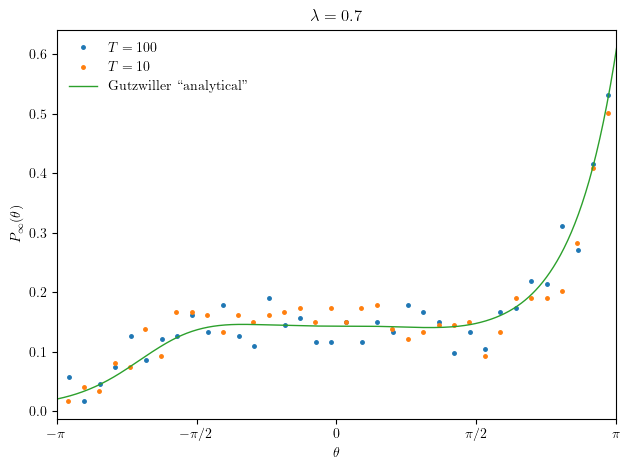

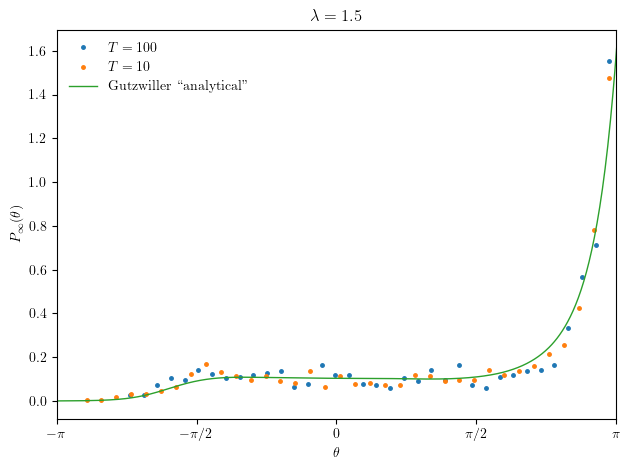

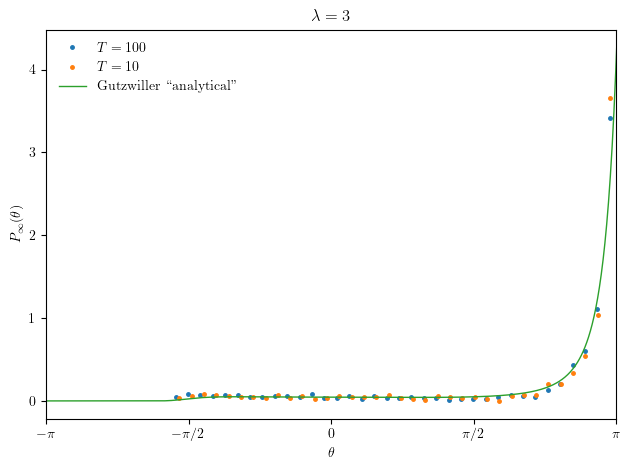

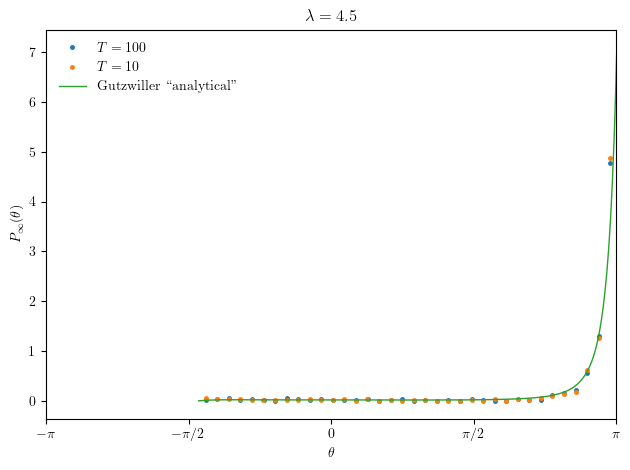

In [3]:
plt.style.use(["./config/stylelib/thesis.mplstyle"])

for i, (sim, sim_short) in enumerate(zip(sim_list[0], sim_list[1])):
    # print(pstates_infty_list[0][i])
    plt.figure()

    thetas = []
    for pstate in pstates_infty_list[0][i]:
        thetas.append(stages.state_to_theta(pstate))

    counts, bins = np.histogram(thetas, 36)
    bin_width = bins[1] - bins[0]
    freqs = counts / sim.Nt / bin_width

    thetas_short = []
    for pstate_short in pstates_infty_list[1][i]:
        thetas_short.append(stages.state_to_theta(pstate_short))

    counts_short, bins_short = np.histogram(thetas_short, 36)
    bin_width_short = bins_short[1] - bins_short[0]
    freqs_short = counts_short / sim_short.Nt / bin_width_short

    plt.plot(bins[:-1] + bin_width/2, freqs, ".", label=rf"$T = {sim.T}$")
    plt.plot(bins_short[:-1] + bin_width_short/2, freqs_short, ".", label=rf"$T = {sim_short.T}$")

    plt.plot(theta_guts_all[i], p_infty_gutz_all[i], label="Gutzwiller ``analytical''")

    plt.xlim((-np.pi, np.pi))
    xticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    xlabels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
    plt.xticks(xticks, xlabels)
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$P_\infty(\theta)$")
    plt.legend(loc="upper left")
    plt.title(rf"$\lambda = {sim.lmbd}$")

    plt.tight_layout()

    # plt.savefig(f"plots/Ns={sim.Ns}-lambda={sim.lmbd}-Nt={sim.Nt}T={sim.T}-dt={sim.dt}.pdf")